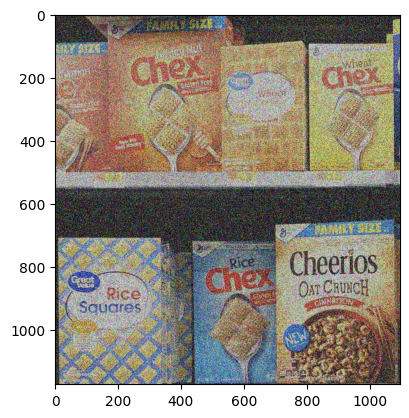

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 

image=cv2.imread('dataset/scenes/scene4.png')

# image=image*255
# image/=225.0
# image=(image*(255/225)).astype(int)
# print(image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

MAX=225


In [ ]:
channel1=image[:,:,0]
channel2=image[:,:,1]
channel3=image[:,:,2]

print(channel3[channel3>MAX])
# print(channel1)
print((channel1/225*255).astype(int))
# print(channel2[:10,:10])
# print(channel3[:10,:10])
# print(channel1[0,2],channel1[0][2])
print(channel1.shape,channel2.shape,channel3.shape)

[226 228 229 ... 228 253 233]
[[  0   0 255 ...   0 230   0]
 [  0 210 164 ... 272  35   0]
 [160   0   0 ...  35   0  35]
 ...
 [ 35 251 160 ... 265 238   0]
 [  0 241   0 ... 268   0   0]
 [185   0   0 ... 267 248 189]]
(1174, 1096) (1174, 1096) (1174, 1096)


In [ ]:
def window_elements(P, W, i, j):
    elements=P[max(0,i-(W-1)//2):min(P.shape[0]-1,i+(W-1)//2)+1,max(0,j-(W-1)//2):min(P.shape[1]-1,j+(W-1)//2)+1]
    return elements.reshape((np.prod(elements.shape),))


def uncorrupted(a):
    return a[(a > 0) & (a < MAX)]


def find_median(a):
    return np.median(a)


def find_mean(a):
    return np.mean(a)


def only_0_and_MAX(a):
    for element in a:
        if element!=0 and element !=MAX:
            return False
    return True


def only_0(a):
    for element in a:
        if element!=0:
            return False
    return True


def only_MAX(a):
    for element in a:
        if element!=MAX:
            return False
    return True

In [ ]:
def median_super_algo(P):
    W=3
    h=2
    Wmax=9
    width,height=P.shape
    for i in range(width):
        for j in range(height):
            # print(j)
            if P[i,j]>0 and P[i,j]<MAX:
                # print('non corrotto', P[i,j])
                continue
            v=window_elements(P,W,i,j)
            V=uncorrupted(v)
            N=len(V)
            while W<=Wmax:
                if N>=W:
                    # print('n>=W', P[i,j])
                    P[i,j]=find_median(V)
                    break
                if W<Wmax:
                    if N<W: #case I
                        W+=h
                        v=window_elements(P,W,i,j)
                        V=uncorrupted(v)
                        N=len(V)
                        # print(W,N)
                        # print('1')
                    else: #case II
                        P[i,j]=find_median(V)
                        W=3
                        # print('2')
                        break
                if W==Wmax:
                    if N<W and N!=0: #caseIII
                        P[i,j]=find_mean(V)
                        # print('3')
                        break
                    if only_0_and_MAX(v): #caseIV
                        P[i,j]=find_mean(v)
                        # print('4')
                        break
                    if only_0(v): #caseV
                        P[i,j]=MAX
                        # print('5')
                        break
                    if only_MAX(v): #caseVI
                        P[i,j]=0
                        # print('6')
                        break
    return P

In [ ]:
# plt.figure(figsize=(20,10))

# plt.subplot(131)
# img = cv2.imread('./dataset/scenes/scene4.png')
# plt.imshow(cv2.cvtColor(channel1, cv2.COLOR_BGR2RGB))

# plt.subplot(132)
# plt.imshow(cv2.cvtColor(channel2, cv2.COLOR_BGR2RGB))

# plt.subplot(133)
# plt.imshow(cv2.cvtColor(channel3 , cv2.COLOR_BGR2RGB))

channel1_=median_super_algo(channel1.copy())
channel2_=median_super_algo(channel2.copy())
channel3_=median_super_algo(channel3.copy())
# channel1_=median_super_algo(channel1_)
# channel2_=median_super_algo(channel2_)
# channel3_=median_super_algo(channel3_)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(channel1_, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(channel2_, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(channel3_ , cv2.COLOR_BGR2RGB))


KeyboardInterrupt: 

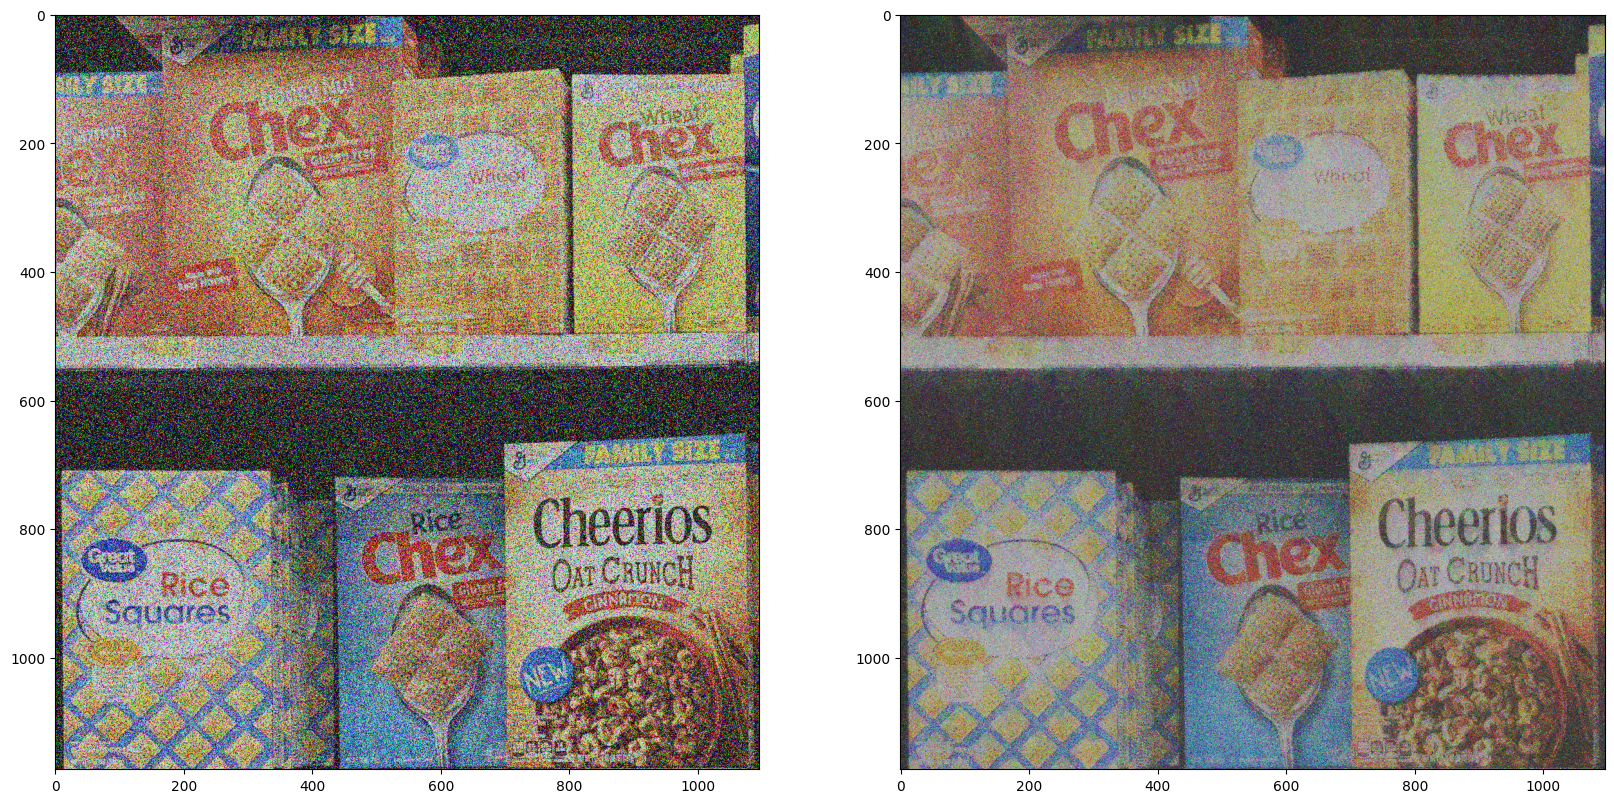

In [ ]:

image2=image.copy()
image2[:,:,0]=channel1_
image2[:,:,1]=channel2_
image2[:,:,2]=channel3_

plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB))

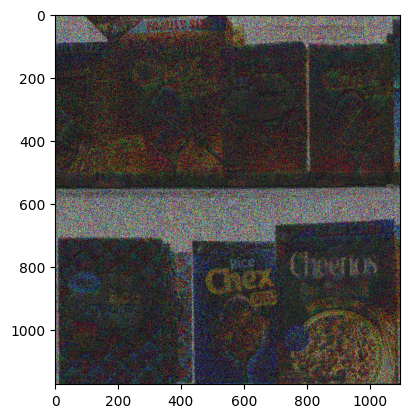

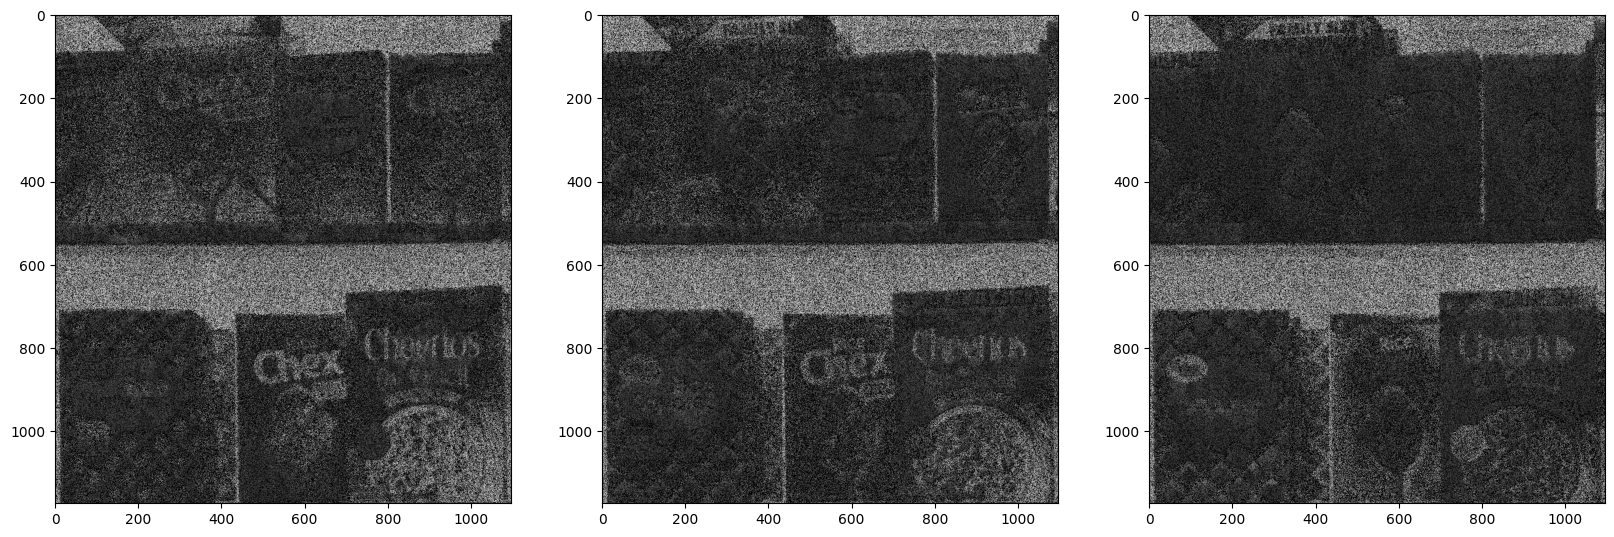

In [ ]:
plt.imshow(image-image2)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(channel1-channel1_, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(channel2-channel2_, cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(channel3-channel3_ , cv2.COLOR_BGR2RGB))


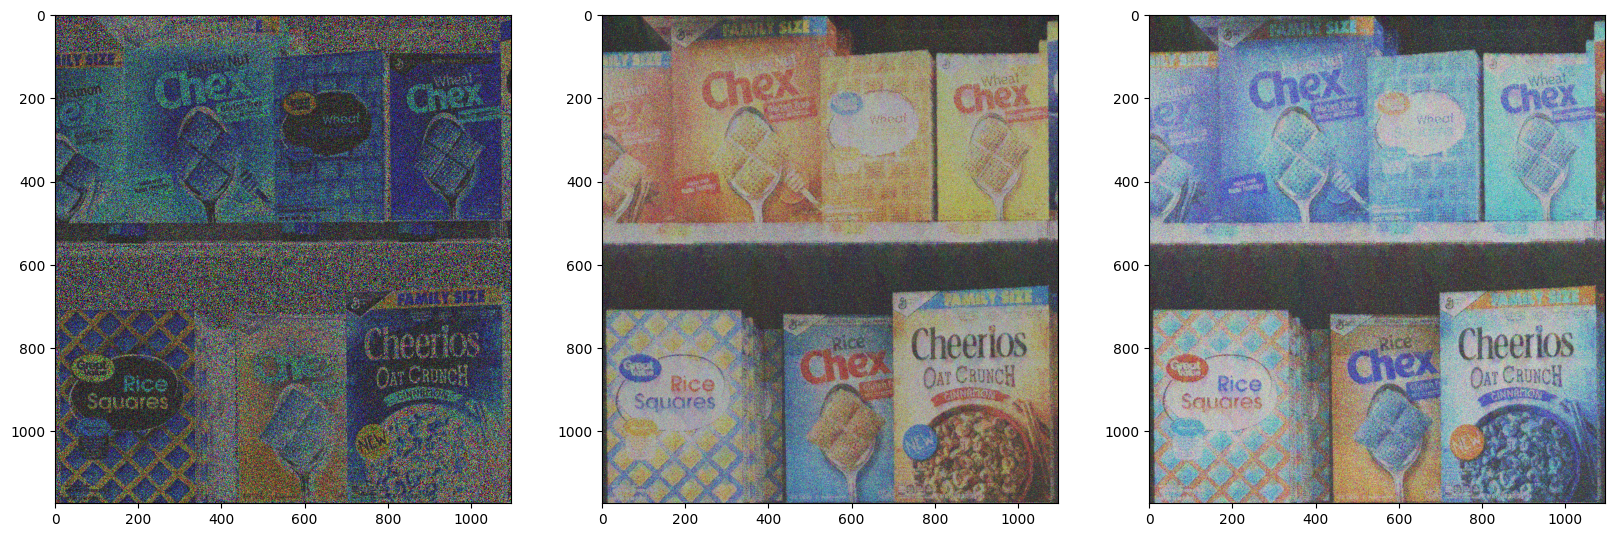

In [188]:
image3 = image2.copy()[:,:,::-1]

for r in range(image3.shape[0]) :
    for c in range(image3.shape[1]) :
        for ch in range(image3.shape[2]) :
            image3[r][c][ch] = (image3[r][c][ch] / 225) * 255

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(image3 , cv2.COLOR_BGR2RGB))

In [192]:
image

array([[[  0, 163,   0],
        [  0,  31, 204],
        [225,   0,   0],
        ...,
        [  0, 240,   0],
        [203,   0,   0],
        [  0, 202,   0]],

       [[  0, 223,  31],
        [186,   0,   0],
        [145, 214, 217],
        ...,
        [240, 172, 148],
        [ 31,   0, 247],
        [  0,  31, 210]],

       [[142, 221,   0],
        [  0,   0, 182],
        [  0,   0,  31],
        ...,
        [ 31,   0,   0],
        [  0,  31,   0],
        [ 31,   0,  31]],

       ...,

       [[ 31,   0, 233],
        [222,   0, 155],
        [142,   0, 152],
        ...,
        [234, 245, 213],
        [210, 139,  31],
        [  0,   0, 221]],

       [[  0, 248, 242],
        [213,  31, 207],
        [  0,   0,   0],
        ...,
        [237, 226, 206],
        [  0, 247,  31],
        [  0,   0,  31]],

       [[164,   0,   0],
        [  0,   0, 223],
        [  0, 235, 196],
        ...,
        [236, 252,   0],
        [219,   0, 139],
        [167, 203, 216]]